In [22]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images

# Read the video and extract frames

In [9]:
count = 0
videoFile = "baby clap.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


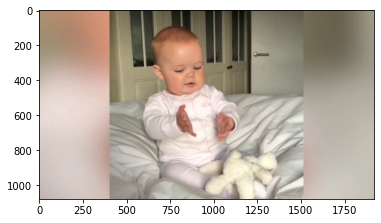

In [10]:
img = plt.imread('frame0.jpg')   # reading image using its name
plt.imshow(img)

# Label images to traing the model

In [15]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()      # printing first five rows of the file

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,1
3,frame3.jpg,1
4,frame4.jpg,1


In [16]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [17]:
y = data.Class
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [20]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [28]:
from keras.applications.vgg16 import preprocess_input
#X = preprocess_input(X, mode='tf')      # preprocessing the input data
X = preprocess_input(X, data_format=None)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

# Building the model

In [31]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [32]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer

58889256/58889256 [==============================] - 32s 1us/step


In [33]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

1/1 [==============================] - 0s 240ms/step


((3, 7, 7, 512), (2, 7, 7, 512))

In [35]:
X_train = X_train.reshape(3, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(2, 7*7*512)

In [36]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [55]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

# Check summary of model

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


# Compile our model

In [57]:
# ii. Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
# iii. Training the model
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
1/1 [==============================] - 1s 647ms/step - loss: 0.9145 - accuracy: 0.0000e+00 - val_loss: 0.0155 - val_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 177ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 7.4422e-04 - val_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 160ms/step - loss: 5.2366e-04 - accuracy: 1.0000 - val_loss: 7.6231e-05 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 159ms/step - loss: 4.8835e-05 - accuracy: 1.0000 - val_loss: 1.2517e-05 - val_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 171ms/step - loss: 7.4704e-06 - accuracy: 1.0000 - val_loss: 2.8610e-06 - val_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 204ms/step - loss: 1.6292e-06 - accuracy: 1.0000 - val_loss: 8.3446e-07 - val_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 268ms/step - loss: 4.3710e-07 - accuracy: 1.0000 - val_loss:

Epoch 56/100
1/1 [==============================] - 0s 169ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 57/100
1/1 [==============================] - 0s 173ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 58/100
1/1 [==============================] - 0s 170ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 59/100
1/1 [==============================] - 0s 184ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 0s 173ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 61/100
1/1 [==============================] - 0s 167ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 62/100
1/1 [==============================] - 0s 171ms/step - loss: 0.0000e+00 - accuracy: 1.0